# Analysis of Data

## Import libraries and data

In [4]:
import pandas as pd
import geopandas as gpd
from collections import Counter

In [3]:
rich_data = pd.read_pickle("data/unique_aligned.pkl")
#convert to geopandas dataframe
rich_data = gpd.GeoDataFrame(rich_data, geometry=rich_data.geometry)

## First Analysis on Professions

In [8]:
# first look into profession data
Counter(rich_data["Métier"])

Counter({'député de la Corse': 58,
         "maître des requêtes au conseil d'Etat": 271,
         'fab. de châles et confections pour dames': 6,
         'tapissier': 13194,
         'bonnetier': 1616,
         'limonadier': 17493,
         'bois de sciage': 1440,
         'estampes': 1306,
         'fleurs raturelles': 1,
         'nécessaires': 158,
         'pap. peints': 118,
         'marquise de las Marismas': 15,
         'loueur de voitures': 3379,
         'chemises': 328,
         'dessin. en broderies': 55,
         'équip. militaire': 6,
         "pianiste de la Chapelle et de la Chambre de l'Empereur": 3,
         'graveur': 823,
         "député de l'Eure": 83,
         'rentier': 22044,
         "fab. d'éventails": 154,
         'vins': 195826,
         '159': 8,
         'corsets': 7422,
         'eaux-de-vie en gros': 100,
         'grav. sur métaux': 321,
         'vins en gros': 10504,
         'de la maison Allain oncle et neveu': 1,
         'anc. chef de la polic

In [4]:
# get only jobs with frequency in dataset higher than 50
freq_jobs = [metier for metier, count in Counter(rich_data["Métier"]).items() if count>50]
print("number of frequent jobs:", len(freq_jobs))

number of frequent jobs: 3675


In [5]:
# see how many rows include frequent jobs
print("all rows:", len(rich_data))
freq_job_data = rich_data[rich_data.Métier.isin(freq_jobs)]
print("only rows with frequent jobs:", len(freq_job_data))

all rows: 2986336
only rows with frequent jobs: 2345953


<AxesSubplot:xlabel='annee'>

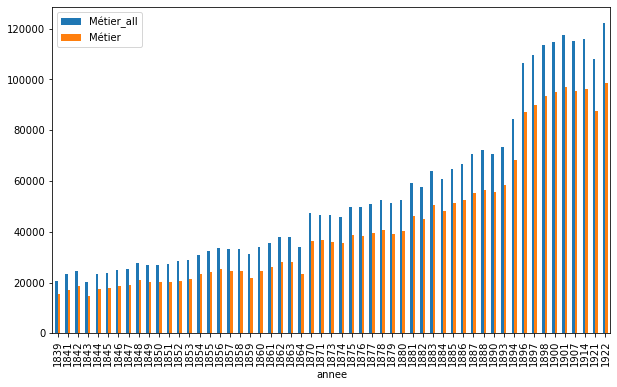

In [7]:
count_year = rich_data.groupby(by="annee").count()[["Métier"]]
count_year_freq = freq_job_data.groupby(by="annee").count()[["Métier"]]
both_freq = count_year.join(count_year_freq, lsuffix="_all")

# this plot shows that the omitting of jobs with frequency <50 is not affecting all years evenly
both_freq.plot.bar(y=["Métier_all", "Métier"], figsize=(10,6))

In [8]:
def plot_jobratio_over_time(df, top_jobnames, job_column="Métier"):
    '''
    Computes the ratio top_job/all_jobs for each year in the dataframe and each job in top_jobnames
    and stores them in a new df.

    Parameters:
    ----------------
    df: dataframe with relevant data
    '''
    #get list of all years in dataframe
    all_years = sorted(df["annee"].unique())
    #instantiate empty dataframe
    df_top_jobs = pd.DataFrame(columns=top_jobnames, index=all_years)
    for year in all_years:
        year_data = df[df["annee"]==year]
        len_year = len(year_data)
        # get ratio for all jobs
        for top_job in top_jobnames:
            job_ratio = len(year_data[year_data[job_column]==top_job])/len_year
            df_top_jobs.loc[year, top_job] = job_ratio   
    return df_top_jobs    

<AxesSubplot:>

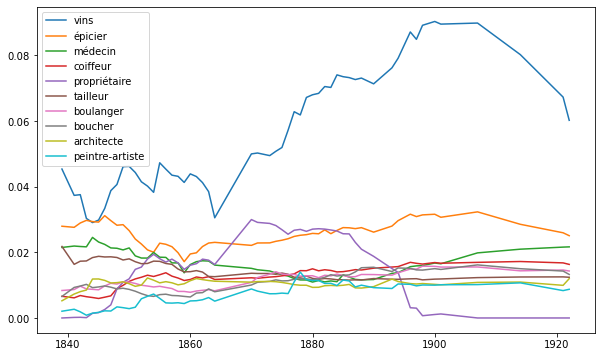

In [9]:
#get ratio of top 10 jobs in dataset
top_jobs10 = Counter(freq_job_data["Métier"]).most_common(10)
top_jobnames10 = [name for name, count in top_jobs10]
plot_jobratio_over_time(rich_data, top_jobnames10).plot.line(figsize=(10,6))

In [10]:
#get ratio of 20 top jobs in dataset
top_jobs20 = Counter(freq_job_data["Métier"]).most_common(20)
top_jobnames20 = [name for name, count in top_jobs20]
plot_jobratio_over_time(rich_data, top_jobnames20).plot.line(figsize=(10,6))

<AxesSubplot:>

## Street statistics

In [ ]:
#does not work yet
'''
#can use the jobcode also to plot most frequent streets
top_streets20 = Counter(rich_data["streetname"]).most_common(20)
top_streets20 = [name for name, count in top_streets20]
plot_jobratio_over_time(rich_data, top_streets20, job_column="streetname").plot.line(figsize=(10,6))
'''

### Working with geodata

In [12]:
# alternative: rich_data.geometry.representative_point
rich_data["centroid"] = rich_data.geometry.centroid

In [22]:
rich_notna = rich_data.dropna()

In [50]:
horloger = rich_notna[rich_notna.Métier=="horloger"]
horloger["centroid"].explore()

In [51]:
modes = rich_notna[rich_notna.Métier=="modes"]
modes["centroid"].explore()